# IMPORT

In [14]:
from google.colab import drive
drive.mount('/content/drive')

# percorso del dataset
file_path = "/content/drive/MyDrive/Progetti data science/Progetto Python/Regressione/songs_spotify.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression

from xgboost import XGBRegressor


from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, roc_curve, auc, confusion_matrix, f1_score
import sklearn.metrics as metrics
from sklearn import set_config
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsRegressor
from prettytable import PrettyTable

# ETL

In [16]:
df = pd.read_csv(file_path, low_memory=False)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [17]:
# Drop delle colonne non necessarie
df = df.drop(columns = ["type", "id", "uri", "track_href", "analysis_url", "song_name","Unnamed: 0", "title" ])
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208,4,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112,4,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823,4,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200,4,hardstyle


# ADDESTRAMENTO MODELLI

### Funzioni e parametri comuni a tutti i modelli

<h3> Seed che sarà usato in tutti gli algoritmi <h3>

In [5]:
seed = 42

<h3> Lista in cui saranno inseriti i risultati dei vari algoritmi

In [6]:
results=[]

<h3> Funzione di supporto per plottare l'andamento delle prestazioni in base a 2 dei parametri utilizzati nella grid search <h3>

In [7]:
# tree_table -> dataset contenente i valori da plottare
# name_param_1 -> nome del primo parametro 
# name_param_2 -> nome del secondo parametro 
# metrica -> nome della metrica utilizzata


def plot_grid_search_line(tree_table, nome_param_1, nome_param_2, metrica = 'Accuracy'):

    # creiamo due pivot_table, uno per i dati della media ed uno per i dati della deviazione standars
    df_media = tree_table.pivot_table(values=metrica, index=nome_param_1, columns=nome_param_2)
    df_std = tree_table.pivot_table(values='Std_deviation', index=nome_param_1, columns=nome_param_2)

    # Creiamo un plot con due figure
    _, (ax1, ax2) = plt.subplots(1,2, figsize = (18, 8))
    
    # per ogni valore assunto dal parametro2 creiamo una linea 
    for valore in sorted(list(set(tree_table[nome_param_2])), reverse=True):
      ax1.plot(df_media[valore], label=f'{nome_param_2}: {valore}', linestyle = '--', marker = 'o')

    ax1.set_title(f'{metrica} media \n per iterazione', fontsize=18, fontweight='bold')
    ax1.set_xlabel(nome_param_1, fontsize=16)
    ax1.set_ylabel(f'Media della {metrica}', fontsize=16)
    ax1.legend(loc="best", fontsize=15)
    ax1.grid('on')

    # per ogni valore assunto dal parametro2 creiamo una linea 
    for valore in sorted(list(set(tree_table[nome_param_2])), reverse=True):
      ax2.plot(df_std[valore], label=f'{nome_param_2}: {valore}', linestyle = '--', marker = 'o')

    ax2.set_title(f'Varianza della {metrica} \n per iterazione', fontsize=18, fontweight='bold')
    ax2.set_xlabel(nome_param_1, fontsize=16)
    ax2.set_ylabel(f'Varianza della {metrica}', fontsize=16)
    ax2.legend(loc="best", fontsize=15)
    ax2.grid('on')


<h3> Funzione di supporto per plottare una heatmap delle prestazioni in base a 3 dei parametri utilizzati nella grid search <h3>

In [8]:
# tree_table -> dataset contenente i valori da plottare
# name_param_1 -> nome del primo parametro 
# name_param_2 -> nome del secondo parametro 
# nome_param_3 -> nome del terzo parametro 

def plot_grid_search_heatmap(tree_table, nome_param_1, nome_param_2, nome_param_3, metrica='Accuracy', size=(20, 6)):

      # estraggo il valore massimo e minimo per la media (servirà per la legenda dell'heatmap)
      min_of_mean = tree_table[metrica].min()
      max_of_mean = tree_table[metrica].max()
      #estraggo il valore massimo e minimo per la deviazione standard (servirà per la legenda dell'heatmap)
      min_of_std = tree_table['Std_deviation'].min()
      max_of_std = tree_table['Std_deviation'].max()
      # estraggo i valori categorici unici nella colonna
      unique_values = sorted(list(set(list(tree_table[nome_param_3]))))

      # creo un subploat con due colonne ed u numero di righe pari al numero di valori unici nel terzo parametro
      fig, axs = plt.subplots(len(unique_values), 2, figsize=size)
      fig.tight_layout(pad=8.0)
      axs = axs.ravel()

      # iteriamo da 0 al doppio del numero di valori unici del parametro tre, con passo pari a due 
      # (in questo modo posso riferirmi al grafico axs[i] per la media ed il grafico axs[i+1] per la varianza) 
      for i in range(0, (len(unique_values))*2, 2):
        # estraiamo i valori nel dataframe relativi all'i_esimo valore unico del parametro_3
        values_for_category = tree_table[tree_table[nome_param_3] == unique_values[int(i/2)]]



        # creo la tabella pivot per l'accuracy e la plotto come heatmap
        acc_heatmap = values_for_category.pivot_table(values=metrica, index=nome_param_1, columns=nome_param_2)
        sns.heatmap(acc_heatmap, annot=True, fmt='.4f', linewidth=.5, ax=axs[i], vmin=min_of_mean, vmax=max_of_mean, cmap = "flare")
        axs[i].set_title(f'{metrica} con {nome_param_3}: \n {unique_values[int(i/2)]}', fontsize=18, fontweight='bold')
        axs[i].set_xlabel(nome_param_2, fontsize=12, fontweight='bold')
        axs[i].set_ylabel(nome_param_1, fontsize=12, fontweight='bold')
        # scorriamo la tabella pivot dell'Accuracy per cercare la posizione del minimo valore
        max_value_acc = 0
        max_col_acc = 0
        max_index_acc = 0
        current_index_acc = 0

        for idx, row in acc_heatmap.iterrows():
          if np.max(row) > max_value_acc:
              max_value_acc = np.max(row) 
              max_col_acc = np.argmax(row)
              max_index_acc = current_index_acc
          current_index_acc += 1 
        
        # plot del rettangolo sulla posizione del massimo valore
        axs[i].add_patch(plt.Rectangle((max_col_acc, max_index_acc), 1, 1, fc='none', ec='black', lw=3, clip_on=False))



        # creo la tabella pivot per la deviazione standard e la plotto come heatmap
        std_heatmap = values_for_category.pivot_table(values='Std_deviation', index=nome_param_1, columns=nome_param_2)
        sns.heatmap(std_heatmap, annot=True, fmt='.4f', linewidth=.5, ax=axs[i+1], vmin=min_of_std, vmax=max_of_std, cmap = "crest")
        axs[i+1].set_title(f'Deviazione standard con {nome_param_3}: \n {unique_values[int(i/2)]}', fontsize=18, fontweight='bold')
        axs[i+1].set_xlabel(nome_param_2, fontsize=12, fontweight='bold')
        axs[i+1].set_ylabel(nome_param_1, fontsize=12, fontweight='bold')
        # scorriamo la tabella pivot della deviazione standard per cercare la posizione del massimo valore
        min_value_std = 100
        min_col_std = 0
        min_index_std = 0
        current_index_std = 0

        for idx, row in std_heatmap.iterrows():
          if np.min(row) < min_value_std:
              min_value_std = np.min(row) 
              min_col_std = np.argmin(row)
              min_index_std = current_index_std
          current_index_std += 1

        # plot del rettangolo sulla posizione del massimo valore
        axs[i+1].add_patch(plt.Rectangle((min_col_std, min_index_std), 1, 1, fc='none', ec='black', lw=3, clip_on=False))


<h3> Funzione per stampare un resoconto della predizione <h3>

In [9]:
def regression_results(y_true, y_pred, res, regressore):

    explained_variance=round(metrics.explained_variance_score(y_true, y_pred), 4)
    mae=round(metrics.mean_absolute_error(y_true, y_pred), 4) 
    mse=round(metrics.mean_squared_error(y_true, y_pred), 4) 
    rmse=round(np.sqrt(mse), 4)
    #mean_squared_log_error=round(metrics.mean_squared_log_error(y_true, y_pred), 4)
    mad=round(metrics.median_absolute_error(y_true, y_pred), 4)
    r2=round(metrics.r2_score(y_true, y_pred), 4)

    results_list = [regressore, r2, mae, mse, rmse, mad]
    #print(f'mean_squared_log_error:  {mean_squared_log_error}')
    print(f'MAE:  {mae}')
    print(f'MSE:  {mse}')
    print(f'RMSE:  {rmse}')
    print(f'MAD: {mad}')
    print(f'r2:  {r2}')
    res.append(results_list)

<h3> Split in train (85%) e test (15%) <h3>

In [10]:
x = df.drop(['danceability'], axis=1)
y = df['danceability']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=seed)


print(f'X_Train: {x_train.shape}')
print(f'X_Test: {x_test.shape}')
print(f'y_Train: {y_train.shape}')
print(f'y_Test: {y_test.shape}')

X_Train: (35959, 13)
X_Test: (6346, 13)
y_Train: (35959,)
y_Test: (6346,)


<h3> Parte della pipeline che sarà uguale in tutti gli algoritmi di regressione (cioè la parte di scaling e di OneHotEncoding) <h3>

In [11]:
# contiene la lista delle colonne da normalizzare (tutte tranne mode che vale o 0 o 1 quindi non ha senso normalizzarlo)
to_normalize = list(x.drop(['mode', 'genre'], axis=1).columns)

# creiamo un normalizer che è una pipeline costituita solo dallo standard scaler
normalizer = make_pipeline(
    RobustScaler(),
    #MinMaxScaler()
)

# creiamo una trasformazione che applica la pipeline di normalizzazione solo alla lista di colonne che ci interessano 
# il "passthrough" dice che le colonne nella lista "to_normalize" vengono normalizzate, 
# le altre invece vengono lasciate invariate (altrimenti senza "passthrough" verrebbero eliminate)
preprocessor = make_column_transformer(
    (normalizer, to_normalize),
    (OneHotEncoder(), ['genre']),
    remainder='passthrough'
)

## REGRESSION TREE

<h3> Creazione della pipeline e scelta dei parametri per la GridSearch <h3>

In [ ]:
tree_pipe = Pipeline(steps = [
    ["scaler" , preprocessor],
    ['tree', DecisionTreeRegressor()]],
    verbose = True)

tree_max_depth = [i for i in range(15, 30, 5)]
tree_min_samples_split = [i for i in range(55, 216, 20)]
tree_criterion = ['squared_error']

param_grid = {
    'tree__max_depth': tree_max_depth,
    'tree__min_samples_split': tree_min_samples_split,
    'tree__random_state': [seed],
    'tree__criterion': tree_criterion,
    }


set_config(display='diagram')
display(tree_pipe)
set_config(display='text')

Pipeline(steps=[['scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['energy', 'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['genre'])])],
                ['tree', DecisionTreeRegressor()]],
         verbose=True)

### Valutazione parametri

<h3> Applichiamo sul dataset di train la GridSearch facendo una Cross Validation con K = 3 <h3>

In [ ]:
scoring = 'r2'

tree_model = GridSearchCV(tree_pipe,
                    param_grid=param_grid,
                    cv=3,
                    n_jobs=-1,
                    scoring=scoring,
                    verbose=80
                    )


# alleniamo il modello e valutiamo i risultati della Cross Validation eseguita dalla GridSearch 
tree_pipe_grid_results = tree_model.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] .............. (step 2 of 2) Processing tree, total=   0.4s


<h3> Prime 10 iterazioni con R2 più alta <h3>

In [ ]:
tree_table = pd.concat([pd.DataFrame(tree_pipe_grid_results.cv_results_["params"]),
                        pd.DataFrame(tree_pipe_grid_results.cv_results_["mean_test_score"], columns=[scoring]), 
                        pd.DataFrame(tree_pipe_grid_results.cv_results_["std_test_score"], columns = ['Std_deviation'])],axis=1)\
                        .sort_values([scoring], ascending=False)
tree_table.head(10)

,tree__criterion,tree__max_depth,tree__min_samples_split,tree__random_state,r2,Std_deviation
5,squared_error,15,155,42,0.499763,0.002723
14,squared_error,20,155,42,0.498990,0.003317
6,squared_error,15,175,42,0.498415,0.004941
23,squared_error,25,155,42,0.498275,0.002910
15,squared_error,20,175,42,0.497949,0.005242
4,squared_error,15,135,42,0.497357,0.005601
24,squared_error,25,175,42,0.496914,0.005539
7,squared_error,15,195,42,0.496294,0.005497
13,squared_error,20,135,42,0.496067,0.005968
22,squared_error,25,135,42,0.495804,0.005007


<h3> Andamento dell'R2 media e della sua deviazione standard in base a min_samples_split e max_depth <h3>

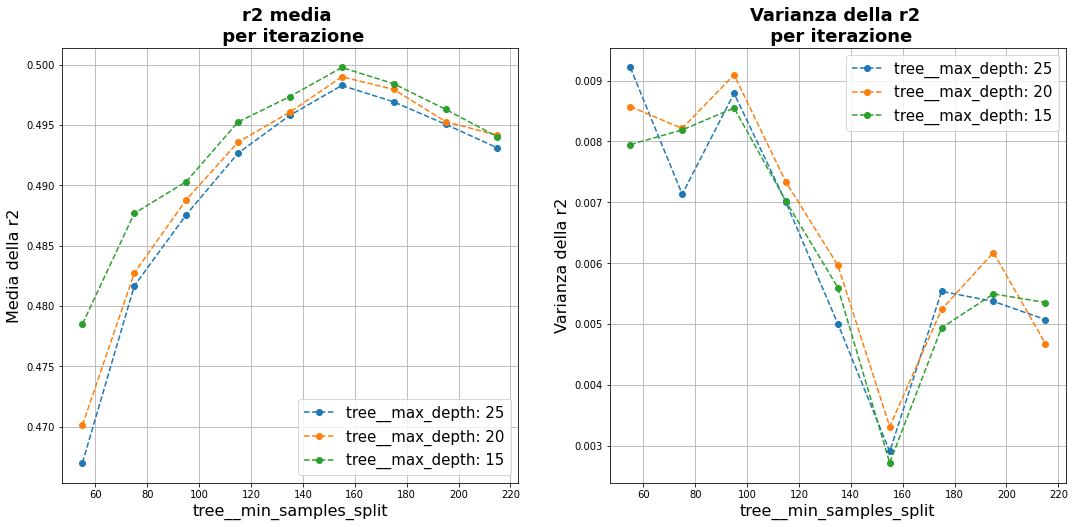

In [ ]:
plot_grid_search_line(tree_table, 'tree__min_samples_split', 'tree__max_depth', metrica=scoring)

<h3> Andamento dell'R2 media e della sua deviazione standard in base a min_samples_split e max_depth per ogni valore di tree_criterion <h3>

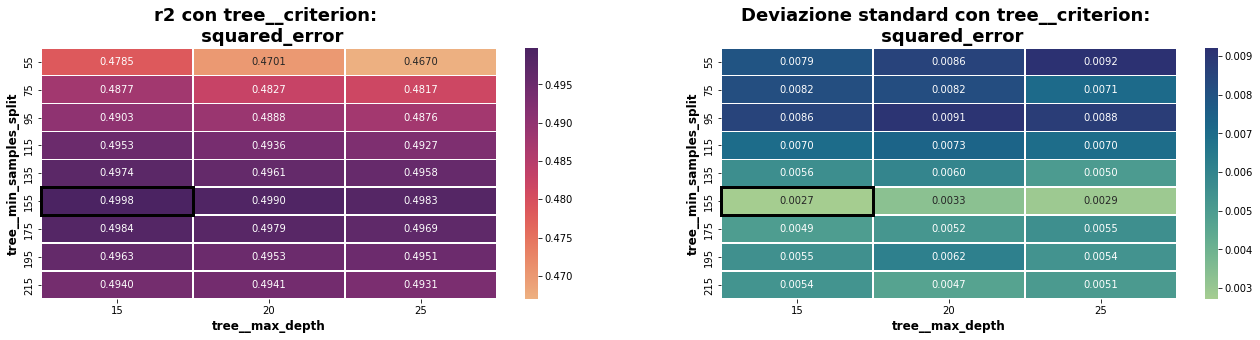

In [ ]:
plot_grid_search_heatmap(tree_table, 'tree__min_samples_split', 'tree__max_depth', 'tree__criterion', size=(20, 6), metrica=scoring)

<h3> Miglior Modello <h3>  

In [ ]:
tree_pipe_grid_results.best_estimator_['tree']

DecisionTreeRegressor(max_depth=15, min_samples_split=155, random_state=42)

### Accuratezza sul Test Set

<h3> Alleniamo un nuovo modello con i parametri ottimi e testiamolo <h3>

In [12]:
tree_model_ottimo = Pipeline(steps = [
    ["scaler" , preprocessor],
    ['tree', DecisionTreeRegressor(max_depth=15, min_samples_split=155, random_state=seed)]],
    verbose = True)


tree_model_ottimo = tree_model_ottimo.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] .............. (step 2 of 2) Processing tree, total=   0.4s


<h3> Stampiamo le metriche per la regressione <h3>

In [13]:
# calcoliamo le predizione del modello sul test_set
tree_predictions_test = tree_model_ottimo.predict(x_test)
# calcoliamo le predizione del modello sul train_set
tree_predictions_train = tree_model_ottimo.predict(x_train)

# inseriamo nella lista results i risultati dell'applicazione del modello
regression_results(y_test, tree_predictions_test, results, 'RegressionTree')

MAE:  0.081
MSE:  0.0116
RMSE:  0.1077
MAD: 0.0617
r2:  0.5294


## RANDOM FOREST 

<h3> Creazione della pipeline e scelta dei parametri per la GridSearch <h3>

In [ ]:
RDF_pipe = Pipeline(steps = [
    ["scaler" , preprocessor],
    ['RDF', RandomForestRegressor()]],
    verbose = True)


RDF__max_depth = [10, 20, 40]
RDF__min_samples_split = [2, 20, 40]
RDF__n_estimators = [300]
RDF__max_features = [0.2, 0.5, 0.7]
RDF__criterion = ['squared_error']

param_grid = {
    'RDF__max_depth': RDF__max_depth,
    'RDF__min_samples_split': RDF__min_samples_split,
    'RDF__random_state': [seed],
    'RDF__n_estimators': RDF__n_estimators,
    'RDF__max_features': RDF__max_features,
    'RDF__criterion': RDF__criterion
    }


set_config(display='diagram')
display(RDF_pipe)
set_config(display='text')

Pipeline(steps=[['scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['energy', 'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['genre'])])],
                ['RDF', RandomForestRegressor()]],
         verbose=True)

### Valutazione parametri

<h3> Applichiamo sul dataset di train la GridSearch facendo una Cross Validation con K = 3 <h3>

In [ ]:
scoring = 'r2'
RDF_model = GridSearchCV(RDF_pipe,
                    param_grid=param_grid,
                    cv=3,
                    n_jobs=-1,
                    verbose=3,
                    scoring=scoring,
                    return_train_score=True
                    )


# alleniamo il modello e valutiamo i risultati della Cross Validation eseguita dalla GridSearch 
RDF_pipe_grid_results = RDF_model.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing RDF, total= 1.1min


<h3> Prime 10 iterazioni con R2 più alto <h3>

In [ ]:
RDF_table = pd.concat([pd.DataFrame(RDF_pipe_grid_results.cv_results_["params"]),
                       pd.DataFrame(RDF_pipe_grid_results.cv_results_["mean_test_score"], columns=[scoring]), 
                       pd.DataFrame(RDF_pipe_grid_results.cv_results_["std_test_score"], columns = ['Std_deviation']),
                       pd.DataFrame(RDF_pipe_grid_results.cv_results_["mean_train_score"], columns=[scoring+"_train"]), 
                       pd.DataFrame(RDF_pipe_grid_results.cv_results_["std_train_score"], columns = ['Std_deviation_train'])], axis=1).\
                       sort_values([scoring], ascending=False)
RDF_table.head()

,RDF__criterion,RDF__max_depth,RDF__max_features,RDF__min_samples_split,RDF__n_estimators,RDF__random_state,r2,Std_deviation,r2_train,Std_deviation_train
21,squared_error,40,0.5,2,300,42,0.648461,0.002539,0.951778,0.000331
24,squared_error,40,0.7,2,300,42,0.648039,0.002091,0.951616,0.000354
15,squared_error,20,0.7,2,300,42,0.643651,0.001798,0.930675,0.000596
12,squared_error,20,0.5,2,300,42,0.643486,0.002738,0.929191,0.000220
18,squared_error,40,0.2,2,300,42,0.640843,0.002749,0.950813,0.000458


<h3> Andamento dell'R2 media e della sua deviazione standard in base a min_samples_split e max_depth <h3>

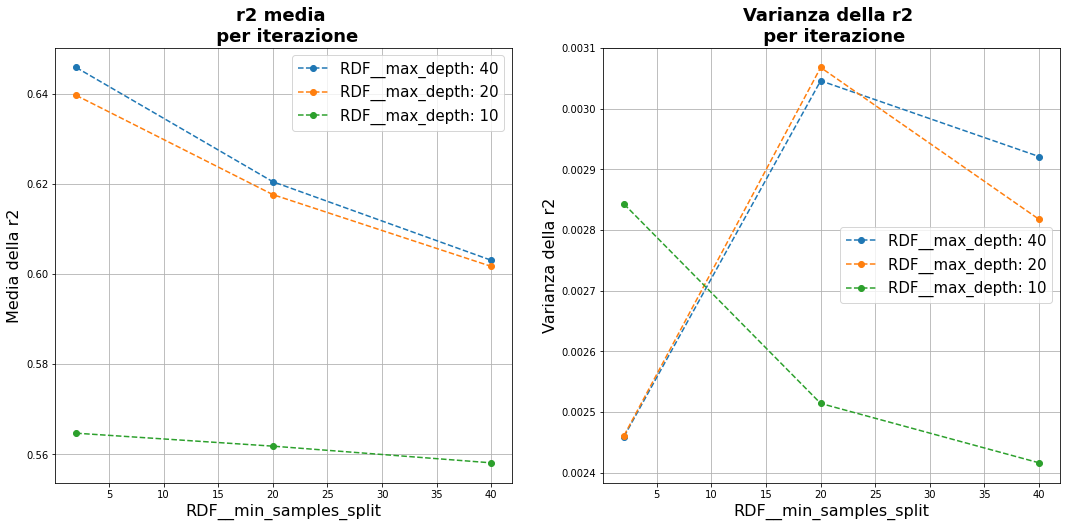

In [ ]:
plot_grid_search_line(RDF_table, 'RDF__min_samples_split', 'RDF__max_depth', metrica=scoring)

<h3> Andamento dell'R2 media e della sua deviazione standard in base a min_samples_split e max_depth per ogni valore di n_estimators <h3>

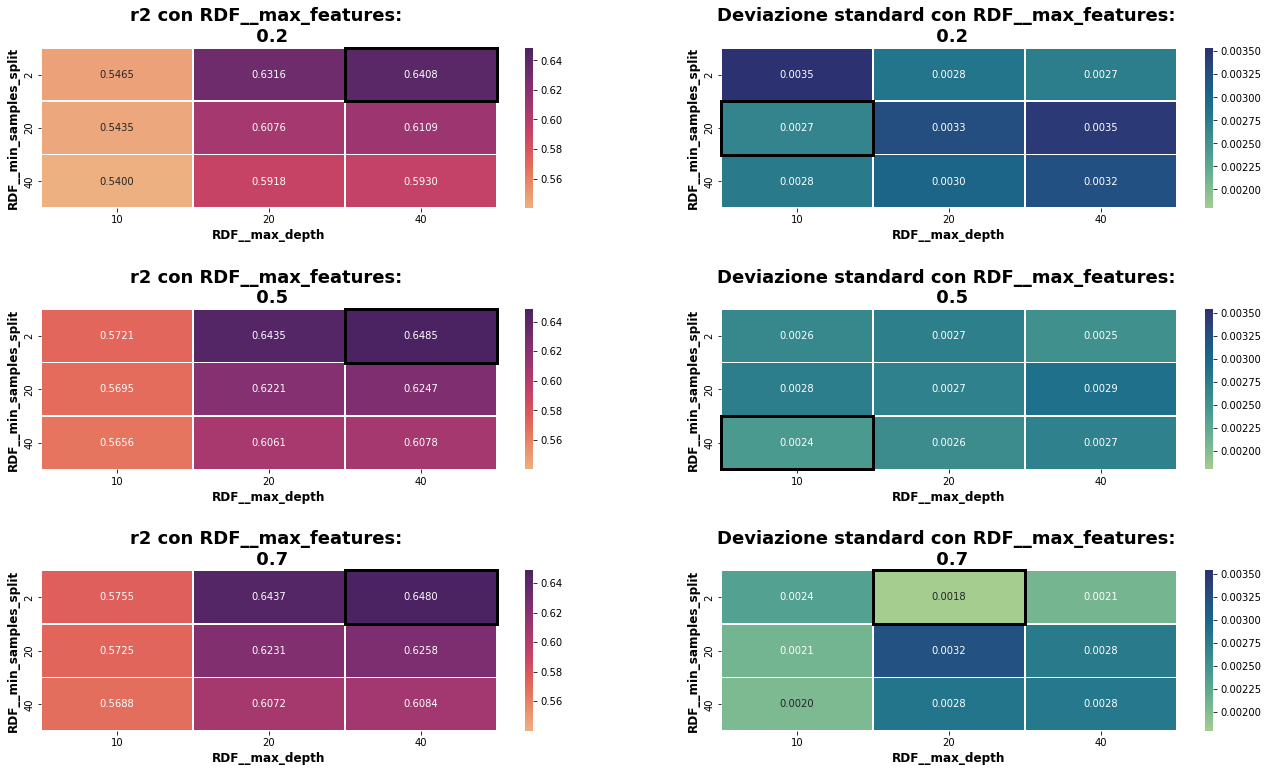

In [ ]:
plot_grid_search_heatmap(RDF_table, 'RDF__min_samples_split', 'RDF__max_depth', 'RDF__max_features', size=(20, 12), metrica=scoring)

<h3> Miglior Modello <h3>  

In [ ]:
RDF_pipe_grid_results.best_estimator_['RDF']

RandomForestRegressor(max_depth=40, max_features=0.5, n_estimators=300,
                      random_state=42)

### Accuratezza sul Test Set

<h3> Alleniamo un nuovo modello con i parametri ottimi e testiamolo <h3>

In [18]:
RDF_pipe_ottimo = Pipeline([
    ("scaler" , preprocessor),
    ("RDF", RandomForestRegressor(n_estimators=600, max_features=0.3, random_state=seed))
    ])


RDF_pipe_ottimo.fit(x_train, y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['energy', 'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                            

<h3> Stampiamo le metriche per la regressione <h3>

In [19]:
# calcoliamo le predizione del modello sul test_set
RDF_predictions_test = RDF_pipe_ottimo.predict(x_test)
# calcoliamo le predizione del modello sul train_set
RDF_predictions_train = RDF_pipe_ottimo.predict(x_train)

# inseriamo nella lista i results i risultati dell'applicazione del modello
regression_results(y_test, RDF_predictions_test, results, 'RandomForest')

MAE:  0.0634
MSE:  0.0078
RMSE:  0.0883
MAD: 0.0455
r2:  0.6826


## SVM

<h3> Creazione della pipeline e scelta dei parametri per la RandomizedSearchCV <h3>

In [ ]:
svr_pipe = Pipeline(steps = [
    ["scaler" , preprocessor],
    ['svr', SVR()]],
    verbose = True)

C = np.logspace(-12, 6, 30)
epsilon = np.logspace(-12, 6, 30)
svr__kernel = ['poly', 'rbf', 'sigmoid', 'precomputed']

param_grid = {'svr__C': C, 
              'svr__epsilon': epsilon,
              'svr__kernel': svr__kernel
              }

set_config(display='diagram')
display(svr_pipe)
set_config(display='text')

Pipeline(steps=[['scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['energy', 'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['genre'])])],
                ['svr', SVR()]],
         verbose=True)

### Valutazione parametri

<h3> Applichiamo sul dataset di train la RandomizedSearchCV facendo una Cross Validation con K = 3 <h3>

In [ ]:
scoring = 'r2'

svr_model = RandomizedSearchCV(svr_pipe,
                    param_distributions=param_grid,
                    cv=3,
                    n_jobs=-1,
                    scoring=scoring,
                    verbose=80,
                    n_iter=10,
                    return_train_score=True
                    )

# alleniamo il modello e valutiamo i risultati della Cross Validation eseguita dalla GridSearch 
svr_pipe_grid_results = svr_model.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


<h3> Prime 10 iterazioni con Accuracy più alta <h3>

In [ ]:
svr_table = pd.concat([pd.DataFrame(svr_pipe_grid_results.cv_results_["params"]),
                        pd.DataFrame(svr_pipe_grid_results.cv_results_["mean_test_score"], columns=[scoring]), 
                        pd.DataFrame(svr_pipe_grid_results.cv_results_["std_test_score"], columns = ['Std_deviation'])],axis=1)\
                        .sort_values([scoring], ascending=False)
svr_table.head(60)

<h3> Andamento dell'Accuracy media e della sua deviazione standard in base a epsilon e C <h3>

In [ ]:
plot_grid_search_line(svr_table, 'svr__C', 'svr__epsilon', metrica=scoring)
#tree_pipe_grid_results.best_estimator_

<h3> Andamento dell'Accuracy media e della sua deviazione standard in base a C e epsilon per ogni valore di gamma <h3>

In [ ]:
plot_grid_search_heatmap(svr_table, 'svr__C', 'svr__epsilon', 'svr__kernel', size=(20, 30), metrica=scoring)

<h3> Miglior Modello <h3>  

In [ ]:
svr_pipe_grid_results.best_estimator_['svr']

### Accuratezza sul Test Set

<h3> Alleniamo un nuovo modello con i parametri ottimi e testiamolo <h3>

In [20]:
svr_model_ottimo = Pipeline(steps = [
    ["scaler" , preprocessor],
    ['svr', SVR(C=6210.169418915603, epsilon=0.0014873521072935117, gamma=2.592943797404667e-06, kernel='rbf')]
    ],
    verbose = True)

svr_model_ottimo = svr_model_ottimo.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total= 2.0min


<h3> Stampiamo le metriche per la regressione <h3>

In [21]:
# calcoliamo le predizione del modello sul test_set
svr_predictions_test = svr_model_ottimo.predict(x_test)
# calcoliamo le predizione del modello sul train_set
svr_predictions_train = svr_model_ottimo.predict(x_train)

# inseriamo nella lista results i risultati dell'applicazione del modello
regression_results(y_test, svr_predictions_test, results, 'SVR')

MAE:  0.0843
MSE:  0.0123
RMSE:  0.1109
MAD: 0.0663
r2:  0.4999


## KNN 

<h3> Creazione della pipeline e scelta dei parametri per la GridSearch <h3>

In [ ]:
knn_pipe = Pipeline(steps = [
    ["scaler" , preprocessor],
    ['knn', KNeighborsRegressor()]],
    verbose = True)

knn_max_depth = [i for i in range(3, 28, 2)]
knn_p = [1]
knn_algorithm = ['ball_tree', 'kd_tree', 'brute']

param_grid = {
    'knn__n_neighbors': knn_max_depth,
    'knn__algorithm': knn_algorithm,
    'knn__p': knn_p
    }


set_config(display='diagram')
display(knn_pipe)
set_config(display='text')

### Valutazione parametri

<h3> Applichiamo sul dataset di train la GridSearch facendo una Cross Validation con K = 3 <h3>

In [ ]:
scoring = 'r2'
knn_model = GridSearchCV(knn_pipe,
                    param_grid=param_grid,
                    cv=3,
                    n_jobs=-1,
                    verbose=3,
                    scoring=scoring
                    )


# alleniamo il modello e valutiamo i risultati della Cross Validation eseguita dalla GridSearch 
knn_pipe_grid_results = knn_model.fit(x_train, y_train)

<h3> Prime 10 iterazioni con R2 più alto <h3>

In [ ]:
knn_table = pd.concat([pd.DataFrame(knn_pipe_grid_results.cv_results_["params"]),
                       pd.DataFrame(knn_pipe_grid_results.cv_results_["mean_test_score"], columns=[scoring]), 
                       pd.DataFrame(knn_pipe_grid_results.cv_results_["std_test_score"], columns = ['Std_deviation'])],axis=1).\
                       sort_values([scoring], ascending=False)
knn_table.head()

<h3> Andamento dell'R2 media e della sua deviazione standard in base a min_samples_split e max_depth <h3>

In [ ]:
plot_grid_search_line(knn_table, 'knn__n_neighbors', 'knn__algorithm', metrica=scoring)

<h3> Andamento dell'R2 media e della sua deviazione standard in base a min_samples_split e max_depth per ogni valore di n_estimators <h3>

In [ ]:
plot_grid_search_heatmap(knn_table, 'knn__n_neighbors', 'knn__algorithm', 'knn__p', size=(16, 7), metrica=scoring)

<h3> Miglior Modello <h3>  

In [ ]:
knn_pipe_grid_results.best_estimator_['knn']

### Accuratezza sul Test Set

<h3> Alleniamo un nuovo modello con i parametri ottimi e testiamolo <h3>

In [23]:
knn_model_ottimo = Pipeline(steps = [
    ["scaler" , preprocessor],
    ['knn', KNeighborsRegressor(algorithm='brute', n_neighbors=21, p=1)]],
    verbose = True)


knn_model_ottimo = knn_model_ottimo.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s


<h3> Stampiamo le metriche per la regressione <h3>

In [24]:
# calcoliamo le predizione del modello sul test_set
knn_predictions_test = knn_model_ottimo.predict(x_test)
# calcoliamo le predizione del modello sul train_set
knn_predictions_train = knn_model_ottimo.predict(x_train)

# inseriamo nella lista i results i risultati dell'applicazione del modello
regression_results(y_test, knn_predictions_test, results, 'KNN')

MAE:  0.0786
MSE:  0.0109
RMSE:  0.1044
MAD: 0.0602
r2:  0.5579


## XGBREGRESSOR

<h3> Creazione della pipeline e scelta dei parametri per la GridSearch <h3>

In [ ]:
XGB_pipe = Pipeline(steps = [
    ["scaler" , preprocessor],
    ['XGB', XGBRegressor()]],
    verbose = True)

XGB__max_depth = [i for i in range(5, 15, 3)]
XGB__n_estimators = [i for i in range(500, 1200, 300)] 
XGB__min_child_weight = [7] # [i for i in range(2, 33, 5)]
XGB__gamma = [0] # [0, 0.001, 0.005, 0.01]
XGB__objective = ['reg:squarederror']
XGB__subsample = [0.95] # [i/10.0 for i in range(5, 10, 2)]
XGB__colsample_bytree = [0.6] # [i/10.0 for i in range(5, 10, 2)]
XGB__reg_alpha = [0.1] # [0.1, 0.15, 0.25, 0.30]
XGB__reg_lambda = [1] # [0, 0.1, 0.2, 0.3, 0.4, 1]

param_grid = {
    'XGB__objective': XGB__objective,
    'XGB__n_estimators': XGB__n_estimators,
    'XGB__random_state': [seed],
    'XGB__min_child_weight': XGB__min_child_weight,
    'XGB__max_depth': XGB__max_depth,
    'XGB__gamma': XGB__gamma,
    'XGB__colsample_bytree': XGB__colsample_bytree,
    'XGB__subsample': XGB__subsample,
    'XGB__reg_alpha': XGB__reg_alpha,
    'XGB__reg_lambda': XGB__reg_lambda
    }


set_config(display='diagram')
display(XGB_pipe)
set_config(display='text')

Pipeline(steps=[['scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['energy', 'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['genre'])])],
                ['XGB', XGBRegressor()]],
         verbose=True)

### Valutazione parametri

<h3> Applichiamo sul dataset di train la GridSearch facendo una Cross Validation con K = 3 <h3>

In [ ]:
scoring = 'r2'
XGB_model = GridSearchCV(XGB_pipe,
                    param_grid=param_grid,
                    cv=3,
                    n_jobs=-1,
                    verbose=3,
                    scoring=scoring,
                    return_train_score=True
                    )


# alleniamo il modello e valutiamo i risultati della Cross Validation eseguita dalla GridSearch 
XGB_pipe_grid_results = XGB_model.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing XGB, total= 1.2min


<h3> Prime 10 iterazioni con R2 più alto <h3>

In [ ]:
XGB_table = pd.concat([pd.DataFrame(XGB_pipe_grid_results.cv_results_["params"]),
                       pd.DataFrame(XGB_pipe_grid_results.cv_results_["mean_test_score"], columns=[scoring]).round(4), 
                       pd.DataFrame(XGB_pipe_grid_results.cv_results_["std_test_score"], columns = ['Std_deviation']).round(4),
                       pd.DataFrame(XGB_pipe_grid_results.cv_results_["mean_train_score"], columns=[scoring+"_train"]).round(4), 
                       pd.DataFrame(XGB_pipe_grid_results.cv_results_["std_train_score"], columns = ['Std_deviation_train']).round(4)], axis=1).\
                       sort_values([scoring], ascending=False)
XGB_table.head(20)

,XGB__colsample_bytree,XGB__gamma,XGB__max_depth,XGB__min_child_weight,XGB__n_estimators,XGB__objective,XGB__random_state,XGB__reg_alpha,XGB__reg_lambda,XGB__subsample,r2,Std_deviation,r2_train,Std_deviation_train
5,0.6,0,8,7,1100,reg:squarederror,42,0.1,1,0.95,0.6739,0.0052,0.9842,0.0003
7,0.6,0,11,7,800,reg:squarederror,42,0.1,1,0.95,0.6736,0.0046,0.9975,0.0001
8,0.6,0,11,7,1100,reg:squarederror,42,0.1,1,0.95,0.6736,0.0046,0.9988,0.0000
6,0.6,0,11,7,500,reg:squarederror,42,0.1,1,0.95,0.6728,0.0047,0.9902,0.0003
4,0.6,0,8,7,800,reg:squarederror,42,0.1,1,0.95,0.6724,0.0052,0.9682,0.0004
10,0.6,0,14,7,800,reg:squarederror,42,0.1,1,0.95,0.6700,0.0038,0.9991,0.0000
11,0.6,0,14,7,1100,reg:squarederror,42,0.1,1,0.95,0.6700,0.0039,0.9993,0.0000
9,0.6,0,14,7,500,reg:squarederror,42,0.1,1,0.95,0.6699,0.0039,0.9981,0.0000
3,0.6,0,8,7,500,reg:squarederror,42,0.1,1,0.95,0.6674,0.0047,0.9321,0.0013
2,0.6,0,5,7,1100,reg:squarederror,42,0.1,1,0.95,0.6553,0.0044,0.8624,0.0025


<h3> Andamento dell'R2 media e della sua deviazione standard in base a ADB__learning_rate e ADB__n_estimators <h3>

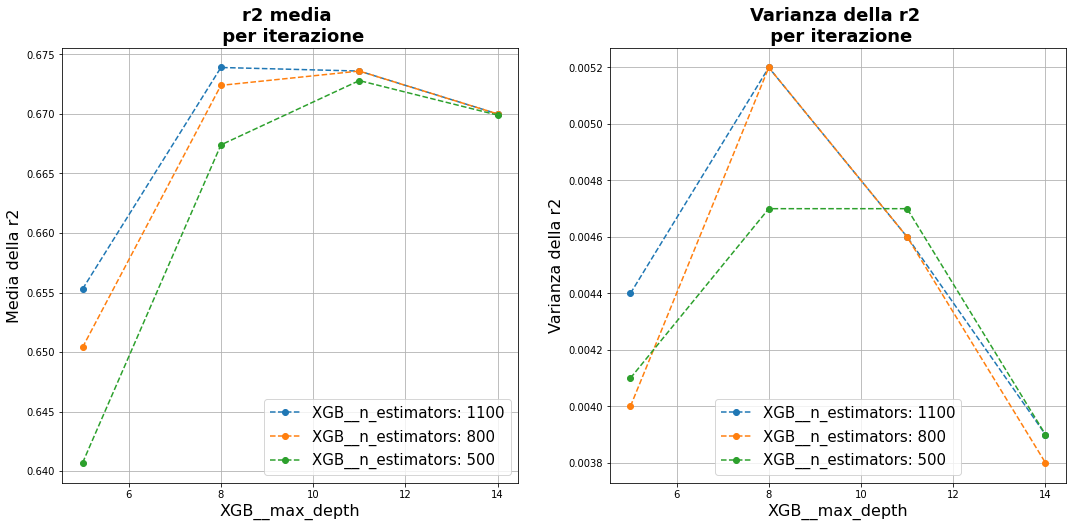

In [ ]:
plot_grid_search_line(XGB_table, 'XGB__max_depth', 'XGB__n_estimators', metrica=scoring)

<h3> Andamento dell'R2 media e della sua deviazione standard in base a ADB__learning_rate e ADB__n_estimators <h3>

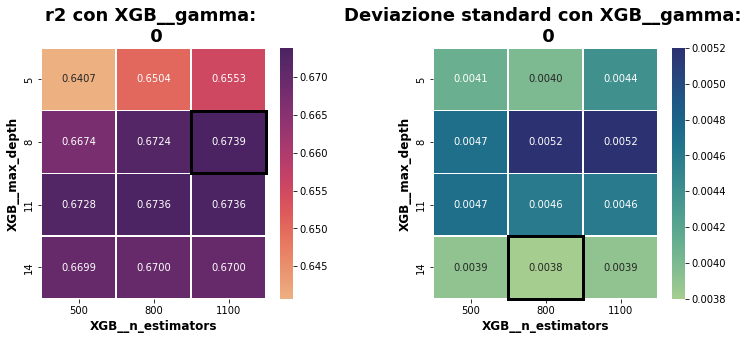

In [ ]:
plot_grid_search_heatmap(XGB_table, 'XGB__max_depth', 'XGB__n_estimators', 'XGB__gamma', size=(12, 6), metrica=scoring)

<h3> Miglior Modello <h3>  

In [ ]:
XGB_pipe_grid_results.best_estimator_['XGB']

XGBRegressor(colsample_bytree=0.6, max_depth=8, min_child_weight=7,
             n_estimators=1100, objective='reg:squarederror', random_state=42,
             reg_alpha=0.1, subsample=0.95)

### Accuratezza sul Test Set

<h3> Alleniamo un nuovo modello con i parametri ottimi e testiamolo <h3>

In [25]:
XGB_pipe_ottimo = Pipeline([
    ("scaler" , preprocessor),
    ("XGB", XGBRegressor(colsample_bytree=0.6, max_depth=8, min_child_weight=7,
             n_estimators=800, objective='reg:squarederror', random_state=42,
             reg_alpha=0.1, subsample=0.95))
    ])


XGB_pipe_ottimo.fit(x_train, y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['energy', 'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                            

<h3> Stampiamo le metriche per la regressione <h3>

In [26]:
# calcoliamo le predizione del modello sul test_set
XGB_predictions_test = XGB_pipe_ottimo.predict(x_test)
# calcoliamo le predizione del modello sul train_set
XGB_predictions_train = XGB_pipe_ottimo.predict(x_train)

# inseriamo nella lista i results i risultati dell'applicazione del modello
regression_results(y_test, XGB_predictions_test, results, 'XGBRegressor')

MAE:  0.0616
MSE:  0.0072
RMSE:  0.0849
MAD: 0.045
r2:  0.7074


## LASSO/RIDGE/LINEAR

### Qui valutiamo se utilizzare una regressione lineare o una regolarizzata (Ridge o Lasso)

Dobbiamo applicare standardizzazione e OneHotEncoding e visualizzare la curva di alpha

In [27]:
x_alpha_test = x_train.copy()

<h3> Normalizzazione

In [28]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x_alpha_test.drop(columns=["genre"]))
x_scaled = pd.DataFrame(x_scaled)

<h3> OneHotEncoding

In [29]:
ohe = OneHotEncoder()
x_ohe = ohe.fit_transform(x_train[['genre']])
x_ohe = pd.DataFrame(x_ohe.toarray())

<h3> Concateniamo le feature normalizzate con le colonne del OHE

In [30]:
x_alpha_test = pd.concat([x_scaled, x_ohe], axis=1)
x_alpha_test

,0,1,2,3,4,5,6,7,8,9,...,5,6,7,8,9,10,11,12,13,14
0,-0.951557,0.625,-0.995871,0.0,-0.282835,-0.071329,0.388223,-0.159383,-0.672928,-0.263336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.186851,0.000,-0.549959,-1.0,0.071577,-0.155077,1.097590,-0.255013,-0.093923,-0.541813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.093426,0.375,-0.294247,0.0,0.011814,0.551268,-0.008463,0.760925,0.875691,-0.415448,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.245675,0.500,-0.628957,-1.0,0.538568,3.938450,-0.008471,-0.149100,0.113260,2.016642,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.228374,-0.750,-1.072667,0.0,2.366227,7.610373,-0.008452,0.976864,0.458564,0.478662,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35954,-0.750865,0.000,-0.245252,0.0,0.635858,1.762140,-0.008471,0.606684,1.185083,-0.218265,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35955,-0.266436,-0.750,0.417561,0.0,-0.071577,0.396913,-0.008471,-0.429820,1.558011,-0.162014,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35956,0.121107,0.250,-0.142857,0.0,-0.246004,-0.153866,1.032851,-0.349100,-0.472376,0.927298,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
35957,-0.737024,-0.750,0.356179,0.0,1.970118,1.905949,-0.008471,0.000000,-0.778729,2.076950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3> Visualizziamo il grafico di alpha per Lasso

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.150e+01, tolerance: 8.811e-02
  model = cd_fast.enet_coordinate_descent(


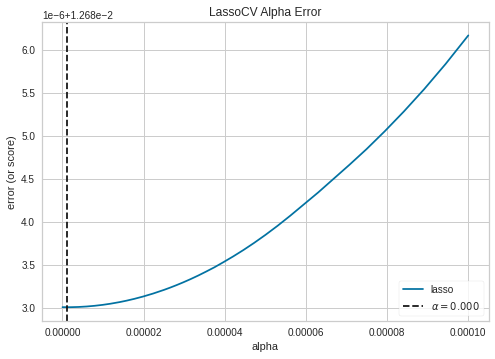

In [31]:
"""from sklearn.linear_model import Ridge, Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-4, -1, 50)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Lasso(),
    alphas=alphas,
    cv=12,
    scoring="r2"
)

visualizer.fit(x_alpha_test, y_train)
visualizer.show()"""



from sklearn.linear_model import LassoCV
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-14, -4, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(x_alpha_test, y_train)
visualizer.show()

L'errore è piccolo per Alpha tendente a 0, perciò conviene utilizzare una semplice regressione lineare

Generally speaking, alpha increases the affect of regularization, e.g. if alpha is zero there is no regularization and the higher the alpha, the more the regularization parameter influences the final model.

Regularization is designed to penalize model complexity, therefore the higher the alpha, the less complex the model, decreasing the error due to variance (overfit). Alphas that are too high on the other hand increase the error due to bias (underfit). It is important, therefore to choose an optimal Alpha such that the error is minimized in both directions

<h3> Visualizziamo il grafico di alpha per Ridge

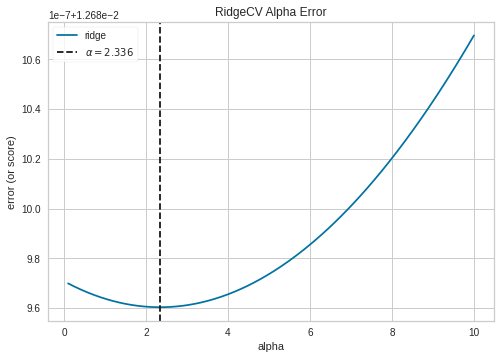

In [32]:
"""import numpy as np

from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(0, 5, 50)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alphas,
    cv=12,
    scoring="neg_mean_squared_error"
)

visualizer.fit(x_alpha_test, y_train)
visualizer.show()"""


from sklearn.linear_model import RidgeCV
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-1, 1, 400)

# Instantiate the linear model and visualizer
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(x_alpha_test, y_train)
visualizer.show()


Il minimo errore si ottiene ponendo alpha pari a 2.130

### LINEARE

<h3> Creazione della pipeline e scelta dei parametri per la GridSearch <h3>

In [33]:
Linear_pipe = Pipeline(steps = [
    ["scaler" , preprocessor],
    ['Linear', LinearRegression()]],
    verbose = True)

param_grid = {}


set_config(display='diagram')
display(Linear_pipe)
set_config(display='text')

Pipeline(steps=[['scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['energy', 'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['genre'])])],
                ['Linear', LinearRegression()]],
         verbose=True)

<h3> Applichiamo sul dataset di train la GridSearch facendo una Cross Validation con K = 3 <h3>

In [34]:
scoring = 'r2'
Linear_model = GridSearchCV(Linear_pipe,
                    param_grid=param_grid,
                    cv=3,
                    n_jobs=-1,
                    verbose=3,
                    scoring=scoring
                    )


# alleniamo il modello e valutiamo i risultati della Cross Validation eseguita dalla GridSearch 
Linear_pipe_grid_results = Linear_model.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing Linear, total=   0.0s


<h3> C'è un'unica iterazione perché non ho parametri <h3>

In [35]:
Linear_table = pd.concat([pd.DataFrame(Linear_pipe_grid_results.cv_results_["params"]),
                       pd.DataFrame(Linear_pipe_grid_results.cv_results_["mean_test_score"], columns=[scoring]), 
                       pd.DataFrame(Linear_pipe_grid_results.cv_results_["std_test_score"], columns = ['Std_deviation'])],axis=1).\
                       sort_values([scoring], ascending=False)
Linear_table

,r2,Std_deviation
0,0.482462,0.001084


#### Accuratezza sul Test Set

<h3> Alleniamo un nuovo modello e testiamolo sul Test Set <h3>

In [36]:
Linear_pipe_ottimo = Pipeline([
    ("scaler" , preprocessor),
    ("Linear", LinearRegression())
    ])


Linear_pipe_ottimo.fit(x_train, y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['energy', 'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                            

<h3> Stampiamo le metriche per la regressione <h3>

In [37]:
# calcoliamo le predizione del modello sul test_set
Linear_predictions_test = Linear_pipe_ottimo.predict(x_test)
# calcoliamo le predizione del modello sul train_set
Linear_predictions_train = Linear_pipe_ottimo.predict(x_train)

# inseriamo nella lista i results i risultati dell'applicazione del modello
regression_results(y_test, Linear_predictions_test, results, 'Linear')

MAE:  0.0853
MSE:  0.0123
RMSE:  0.1109
MAD: 0.0677
r2:  0.5026


### Lasso

<h3> Creazione della pipeline e scelta dei parametri per la GridSearch <h3>

In [38]:
Lasso_pipe = Pipeline(steps = [
    ["scaler" , preprocessor],
    ['Lasso', Lasso()]],
    verbose = True)


Lasso__alpha = np.linspace(1e-9, 0.005, num=100)

param_grid = {
    #'Lasso__estimator': Lasso__estimator,
    'Lasso__alpha': Lasso__alpha,
    'Lasso__random_state': [seed]
        }


set_config(display='diagram')
display(Lasso_pipe)
set_config(display='text')
Lasso__alpha

Pipeline(steps=[['scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['energy', 'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['genre'])])],
                ['Lasso', Lasso()]],
         verbose=True)

array([1.00000000e-09, 5.05060404e-05, 1.01011081e-04, 1.51516121e-04,
       2.02021162e-04, 2.52526202e-04, 3.03031242e-04, 3.53536283e-04,
       4.04041323e-04, 4.54546364e-04, 5.05051404e-04, 5.55556444e-04,
       6.06061485e-04, 6.56566525e-04, 7.07071566e-04, 7.57576606e-04,
       8.08081646e-04, 8.58586687e-04, 9.09091727e-04, 9.59596768e-04,
       1.01010181e-03, 1.06060685e-03, 1.11111189e-03, 1.16161693e-03,
       1.21212197e-03, 1.26262701e-03, 1.31313205e-03, 1.36363709e-03,
       1.41414213e-03, 1.46464717e-03, 1.51515221e-03, 1.56565725e-03,
       1.61616229e-03, 1.66666733e-03, 1.71717237e-03, 1.76767741e-03,
       1.81818245e-03, 1.86868749e-03, 1.91919254e-03, 1.96969758e-03,
       2.02020262e-03, 2.07070766e-03, 2.12121270e-03, 2.17171774e-03,
       2.22222278e-03, 2.27272782e-03, 2.32323286e-03, 2.37373790e-03,
       2.42424294e-03, 2.47474798e-03, 2.52525302e-03, 2.57575806e-03,
       2.62626310e-03, 2.67676814e-03, 2.72727318e-03, 2.77777822e-03,
      

#### Valutazione parametri

<h3> Applichiamo sul dataset di train la GridSearch facendo una Cross Validation con K = 3 <h3>

In [39]:
scoring = 'r2'
Lasso_model = GridSearchCV(Lasso_pipe,
                    param_grid=param_grid,
                    cv=3,
                    n_jobs=-1,
                    verbose=3,
                    scoring=scoring
                    )


# alleniamo il modello e valutiamo i risultati della Cross Validation eseguita dalla GridSearch 
Lasso_pipe_grid_results = Lasso_model.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing Lasso, total=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.149e+01, tolerance: 8.811e-02
  model = cd_fast.enet_coordinate_descent(


<h3> Prime 10 iterazioni con R2 più alto <h3>

In [40]:
Lasso_table = pd.concat([pd.DataFrame(Lasso_pipe_grid_results.cv_results_["params"]),
                       pd.DataFrame(Lasso_pipe_grid_results.cv_results_["mean_test_score"], columns=[scoring]), 
                       pd.DataFrame(Lasso_pipe_grid_results.cv_results_["std_test_score"], columns = ['Std_deviation'])],axis=1).\
                       sort_values([scoring], ascending=False)
Lasso_table

,Lasso__alpha,Lasso__random_state,r2,Std_deviation
0,1.000000e-09,42,0.482462,0.001084
1,5.050604e-05,42,0.482448,0.001084
2,1.010111e-04,42,0.482347,0.001071
3,1.515161e-04,42,0.482185,0.001065
4,2.020212e-04,42,0.481955,0.001062
...,...,...,...,...
95,4.797980e-03,42,0.372540,0.003912
96,4.848485e-03,42,0.370719,0.003914
97,4.898990e-03,42,0.368874,0.003907
98,4.949495e-03,42,0.366998,0.003909


<h3> Andamento dell'R2 media e della sua deviazione standard in base al valore di Lasso__alpha

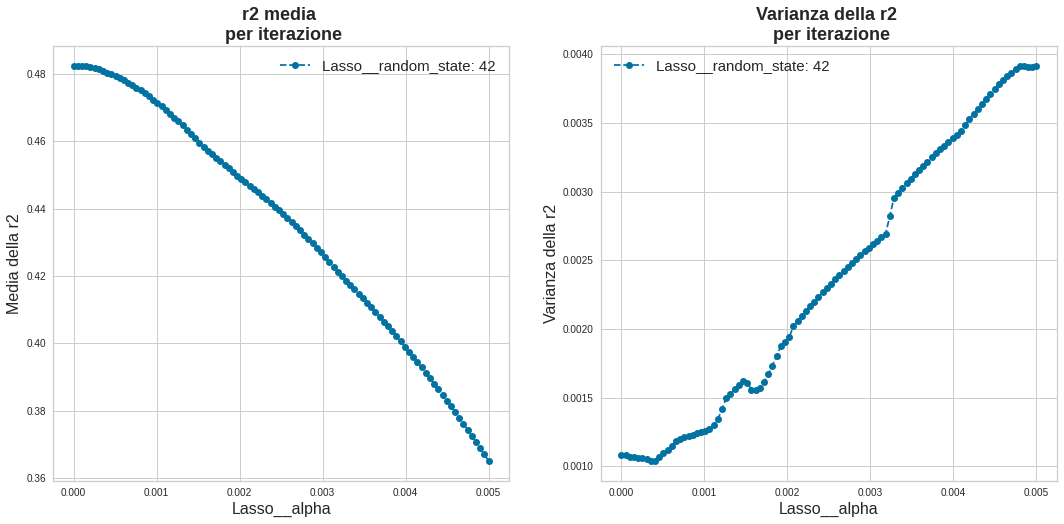

In [41]:
plot_grid_search_line(Lasso_table, 'Lasso__alpha', 'Lasso__random_state', metrica=scoring)

<h3> Miglior Modello <h3>  

In [42]:
Lasso_pipe_grid_results.best_estimator_['Lasso']

Lasso(alpha=1e-09, random_state=42)

#### Accuratezza sul Test Set

<h3> Alleniamo un nuovo modello con i parametri ottimi e testiamolo <h3>

In [43]:
Lasso_pipe_ottimo = Pipeline([
    ("scaler" , preprocessor),
    ("Lasso", Lasso(alpha=1e-09, random_state=42))
    ])


Lasso_pipe_ottimo.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.149e+01, tolerance: 8.811e-02
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['energy', 'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                            

<h3> Stampiamo le metriche per la regressione <h3>

In [44]:
# calcoliamo le predizione del modello sul test_set
Lasso_predictions_test = Lasso_pipe_ottimo.predict(x_test)
# calcoliamo le predizione del modello sul train_set
Lasso_predictions_train = Lasso_pipe_ottimo.predict(x_train)

# inseriamo nella lista i results i risultati dell'applicazione del modello
regression_results(y_test, Lasso_predictions_test, results, 'Lasso')

MAE:  0.0853
MSE:  0.0123
RMSE:  0.1109
MAD: 0.0677
r2:  0.5026


### RIDGE

<h3> Creazione della pipeline e scelta dei parametri per la GridSearch <h3>

In [45]:
Ridge_pipe = Pipeline(steps = [
    ["scaler" , preprocessor],
    ['Ridge', Ridge()]],
    verbose = True)


Ridge__alpha = np.linspace(0.05, 5, num=200)

param_grid = {
    #'Ridge__estimator': Ridge__estimator,
    'Ridge__alpha': Ridge__alpha,
    'Ridge__random_state': [seed]
        }


set_config(display='diagram')
display(Ridge_pipe)
set_config(display='text')

Pipeline(steps=[['scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['energy', 'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['genre'])])],
                ['Ridge', Ridge()]],
         verbose=True)

#### Valutazione parametri

<h3> Applichiamo sul dataset di train la GridSearch facendo una Cross Validation con K = 3 <h3>

In [46]:
scoring = 'r2'
Ridge_model = GridSearchCV(Ridge_pipe,
                    param_grid=param_grid,
                    cv=3,
                    n_jobs=-1,
                    verbose=3,
                    scoring=scoring
                    )


# alleniamo il modello e valutiamo i risultati della Cross Validation eseguita dalla GridSearch 
Ridge_pipe_grid_results = Ridge_model.fit(x_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing Ridge, total=   0.0s


<h3> Prime 10 iterazioni con R2 più alto <h3>

In [47]:
Ridge_table = pd.concat([pd.DataFrame(Ridge_pipe_grid_results.cv_results_["params"]),
                       pd.DataFrame(Ridge_pipe_grid_results.cv_results_["mean_test_score"], columns=[scoring]), 
                       pd.DataFrame(Ridge_pipe_grid_results.cv_results_["std_test_score"], columns = ['Std_deviation'])],axis=1).\
                       sort_values([scoring], ascending=False)
Ridge_table

,Ridge__alpha,Ridge__random_state,r2,Std_deviation
135,3.408040,42,0.482464,0.001098
134,3.383166,42,0.482464,0.001098
136,3.432915,42,0.482464,0.001098
133,3.358291,42,0.482464,0.001098
137,3.457789,42,0.482464,0.001098
...,...,...,...,...
4,0.149497,42,0.482463,0.001085
3,0.124623,42,0.482463,0.001085
2,0.099749,42,0.482463,0.001085
1,0.074874,42,0.482463,0.001085


<h3> Andamento dell'R2 media e della sua deviazione standard in base al valore di alpha <h3>

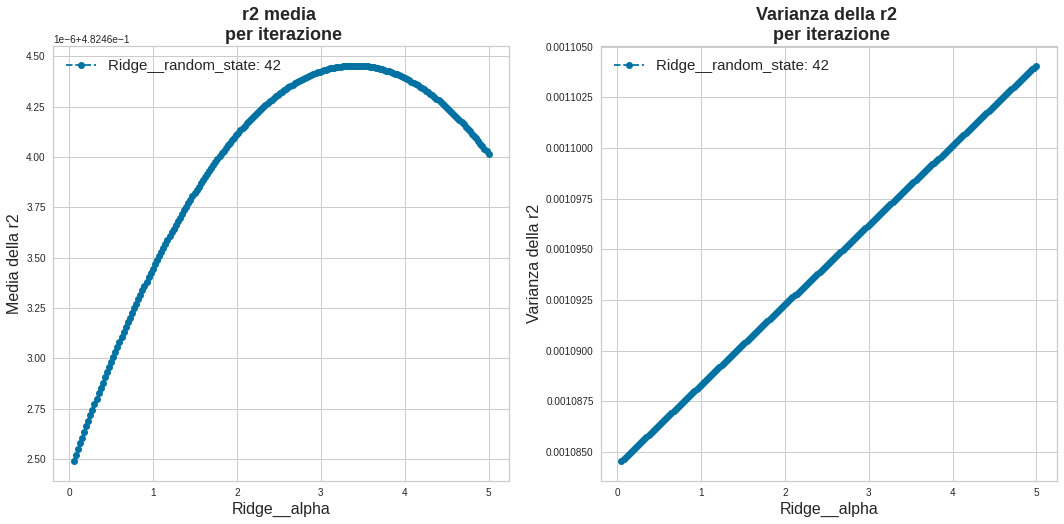

In [48]:
plot_grid_search_line(Ridge_table, 'Ridge__alpha', 'Ridge__random_state', metrica=scoring)

<h3> Miglior Modello <h3>  

In [49]:
Ridge_pipe_grid_results.best_estimator_['Ridge']

Ridge(alpha=3.4080402010050252, random_state=42)

#### Accuratezza sul Test Set

<h3> Alleniamo un nuovo modello con i parametri ottimi e testiamolo <h3>

In [50]:
Ridge_pipe_ottimo = Pipeline([
    ("scaler" , preprocessor),
    ("Ridge", Ridge(alpha=3.35829))
    ])


Ridge_pipe_ottimo.fit(x_train, y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['energy', 'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                            

<h3> Stampiamo le metriche per la regressione <h3>

In [51]:
# calcoliamo le predizione del modello sul test_set
Ridge_predictions_test = Ridge_pipe_ottimo.predict(x_test)
# calcoliamo le predizione del modello sul train_set
Ridge_predictions_train = Ridge_pipe_ottimo.predict(x_train)

# inseriamo nella lista i results i risultati dell'applicazione del modello
regression_results(y_test, Ridge_predictions_test, results, 'Ridge')

MAE:  0.0853
MSE:  0.0123
RMSE:  0.1109
MAD: 0.0678
r2:  0.5025


# CONFRONTO RISULTATI

In [52]:
table = PrettyTable()
table.field_names = ['Model',  'R2','mean_absolute_error', 'mean_squared_error', 'rot_mean_squared_error', 'median_absolute_error']
for elem in results:
  table.add_row(elem)
print(table)

+----------------+--------+---------------------+--------------------+------------------------+-----------------------+
|     Model      |   R2   | mean_absolute_error | mean_squared_error | rot_mean_squared_error | median_absolute_error |
+----------------+--------+---------------------+--------------------+------------------------+-----------------------+
| RegressionTree | 0.5294 |        0.081        |       0.0116       |         0.1077         |         0.0617        |
|  RandomForest  | 0.6826 |        0.0634       |       0.0078       |         0.0883         |         0.0455        |
|      SVR       | 0.4999 |        0.0843       |       0.0123       |         0.1109         |         0.0663        |
|      KNN       | 0.5579 |        0.0786       |       0.0109       |         0.1044         |         0.0602        |
|  XGBRegressor  | 0.7074 |        0.0616       |       0.0072       |         0.0849         |         0.045         |
|     Linear     | 0.5026 |        0.085